<a href="https://colab.research.google.com/github/Janebhop/fraud-detection-course/blob/main/notebook/chapter1/Fraud_Detection_Part_I_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

## อะไรคือ Exploratory Data Analysis ?
    
&emsp; ในการทำงานทางด้าน Data Science ปฏิเสธเลยไม่ได้ว่าการเลือกใช้ข้อมูลในการทำโมเดลเป็นขั้นตอนที่สำคัญมากขั้นตอนหนึ่ง เพื่อทำให้โมเดลมีประสิทธิภาพที่สูงขึ้น ซึ่งขั้นตอนในการพิจารณาที่จะเลือกใช้ข้อมูลนั้น คือขั้นตอนการทำ Exploratory Data Analysis หรือ EDA นั้นเอง

การทำ EDA เป็นการหารูปแบบเฉพาะที่สำคัญของข้อมูลที่เราสนใจด้วยโมเดลทางสถิติ หรือกราฟทางสถิติ เพื่อหาความสัมพันธ์ระหว่างชุดข้อมูลนั้นๆ ทำให้เข้าใจข้อมูล และอธิบายข้อมูล รวมถึงตั้งคำถามเกี่ยวกับข้อมูลชุดนั้นได้ดีขึ้น

ใน Tutorials ชุดนี้ เป็นการทำ EDA กับ Synthetic PaySim Datasets
> ที่มาข้อมูล : https://www.kaggle.com/ntnu-testimon/paysim1

โดยจะเน้นไปในด้านการทำ Data visualization ด้วยกราฟทางสถิติเพื่อหาความสัมพันธ์ของชุดข้อมูลดังกล่าว

In [ ]:
### mount drive
import os,sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
# %cd /content/
### check current dir 
!pwd
### simulate drive from Colab Notebooks to
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path) 

Mounted at /content/drive
/content


In [36]:
### import libary ที่จะใช้
import pandas as pd
import numpy as np
import matplotlib
from matplotlib.cbook import boxplot_stats 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Read data from csv file
pathFile = '/content/drive/My Drive/Fraud Detection PaySim Data/PS_20174392719_1491204439457_log.csv'
df_check = pd.read_csv(pathFile, nrows=10)
float_cols = [c for c in df_check if df_check[c].dtype == "float64"]
float32_cols = {c: np.float32 for c in float_cols}

paysimData = pd.read_csv(pathFile, engine='c', dtype=float32_cols)

In [ ]:
paysimData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float32
 3   nameOrig        object 
 4   oldbalanceOrg   float32
 5   newbalanceOrig  float32
 6   nameDest        object 
 7   oldbalanceDest  float32
 8   newbalanceDest  float32
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float32(5), int64(3), object(3)
memory usage: 412.6+ MB


In [ ]:
# Check null data
paysimData.isnull().values.any()

False

In [ ]:
paysimData.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.639648,C1231006815,170136.0,160296.359375,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.280029,C1666544295,21249.0,19384.720703,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.000000,C1305486145,181.0,0.000000,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.000000,C840083671,181.0,0.000000,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.139648,C2048537720,41554.0,29885.859375,M1230701703,0.0,0.0,0,0


In [ ]:
paysimData.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.000000,239.000000,3.350000e+02,743.0
amount,6362620.0,1.779883e+05,5.991358e+05,0.0,13389.570312,74871.937500,2.087215e+05,92445520.0
oldbalanceOrg,6362620.0,8.246191e+05,2.831753e+06,0.0,0.000000,14208.000000,1.073152e+05,59585040.0
newbalanceOrig,6362620.0,8.503204e+05,2.862818e+06,0.0,0.000000,0.000000,1.442584e+05,49585040.0
oldbalanceDest,6362620.0,1.097866e+06,3.369338e+06,0.0,0.000000,132705.664062,9.430367e+05,356015904.0
newbalanceDest,6362620.0,1.221764e+06,3.629806e+06,0.0,0.000000,214661.445312,1.111909e+06,356179264.0
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.000000,0.000000,0.000000e+00,1.0
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.000000,0.000000,0.000000e+00,1.0


## Bar chart

&emsp; Bar chart เป็นกราฟที่มีลักษณะเป็นรูปแท่ง โดยเหมาะสำหรับเปรียบเที่ยบข้อมูลของแต่ละประเภทที่แตกต่างกัน

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


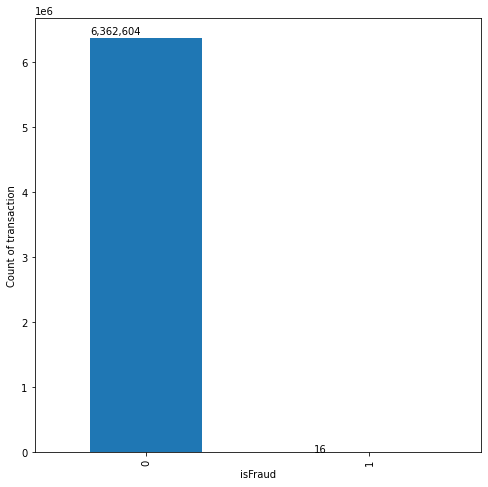

In [ ]:
print(paysimData['isFlaggedFraud'].value_counts())
ax = paysimData['isFlaggedFraud'].value_counts().plot(kind='bar', figsize=(8,8))
ax.set_xlabel("isFraud")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

0    6354407
1       8213
Name: isFraud, dtype: int64


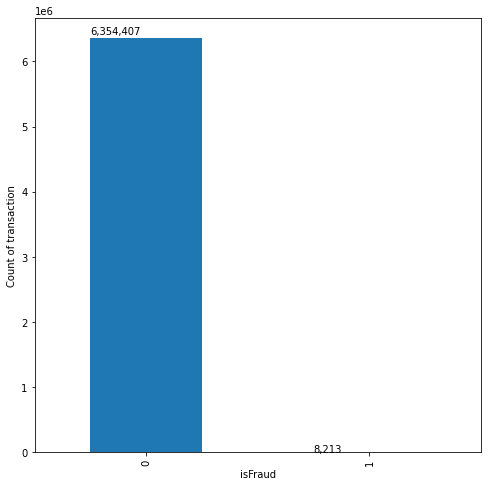

In [ ]:
print(paysimData['isFraud'].value_counts())
ax = paysimData['isFraud'].value_counts().plot(kind='bar', figsize=(8,8));
ax.set_xlabel("isFraud")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

In [ ]:
paysimData.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

isFraud
0    7.783676e+12
1    1.051024e+10
Name: newbalanceDest, dtype: float32


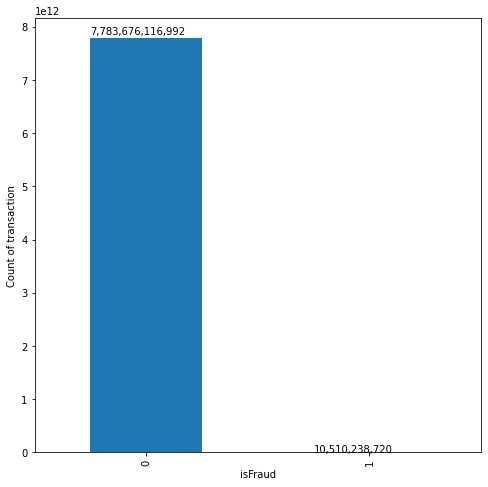

In [ ]:
colSelect = 'amount'
print(paysimData.groupby(['isFraud'])[colSelect].sum())
ax = paysimData.groupby(['isFraud'])[colSelect].sum().plot(kind='bar', figsize=(8,8));
ax.set_xlabel("isFraud")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

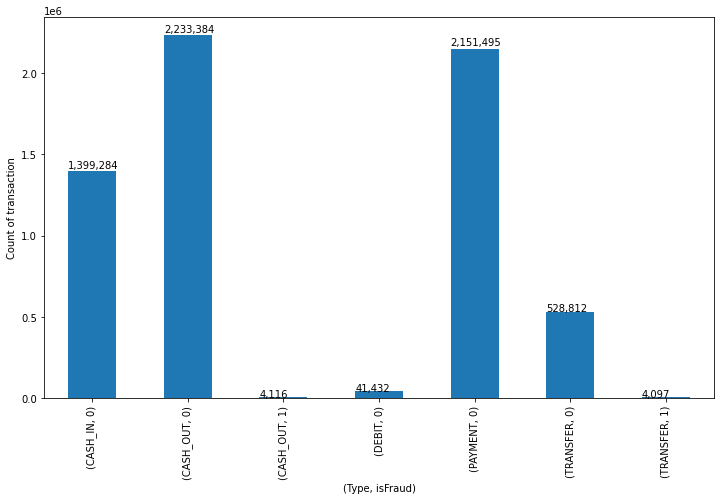

In [ ]:
ax = paysimData.groupby(['type', 'isFraud']).size().plot(kind='bar', figsize=(12,7))
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

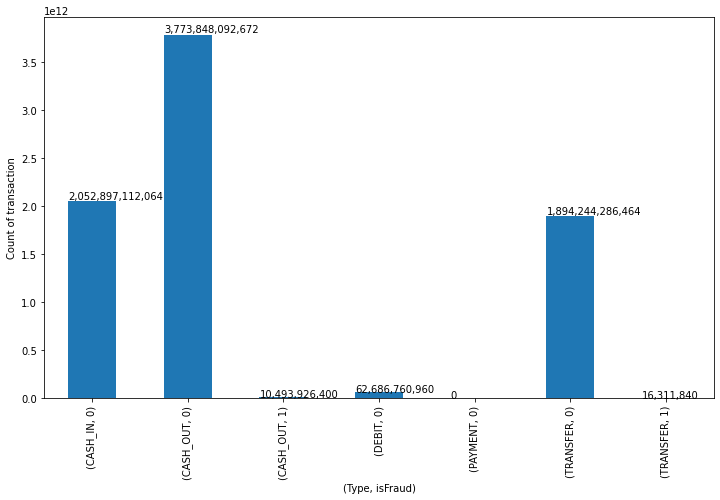

In [ ]:
ax = paysimData.groupby(['type', 'isFraud'])[colSelect].sum().plot(kind='bar', figsize=(12,7))
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

## Strip plot 

Stripplot เป็นกราฟที่ใช้ดูการแจกแจงของของมูลแบบหนึ่ง ซึ่งสามารถเปรียบเทียบลักษณะการกระจายตัวของข้อมูลในแต่ละกลุ่มได้ โดยแกนนอน (แกน x) จะเป็นประเภทของกลุ่มข้อมูล และแกนตั้ง (แกน y) จะแสดงรูปแบบการกระจายตัวของข้อมูล ซึ่งแต่ละค่าจะแทนด้วยจุดแต่ะละจุด

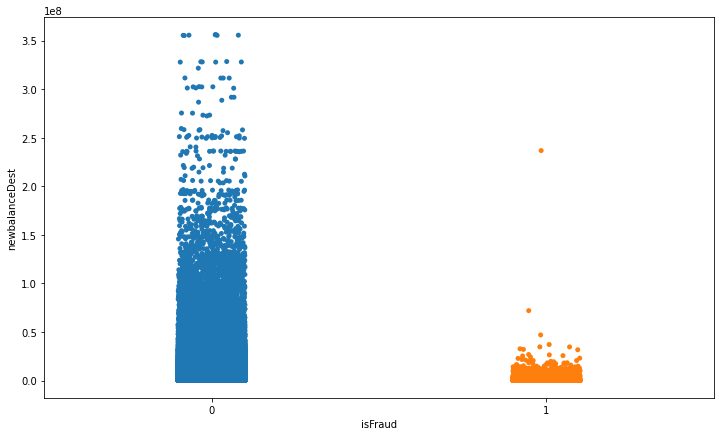

In [ ]:
#set x y axis
x_axis = 'isFraud'
y_axis = 'amount'

#plot stripplot
plt.figure(figsize=(12,7))
ax = sns.stripplot(x=x_axis, y=y_axis,data = paysimData)

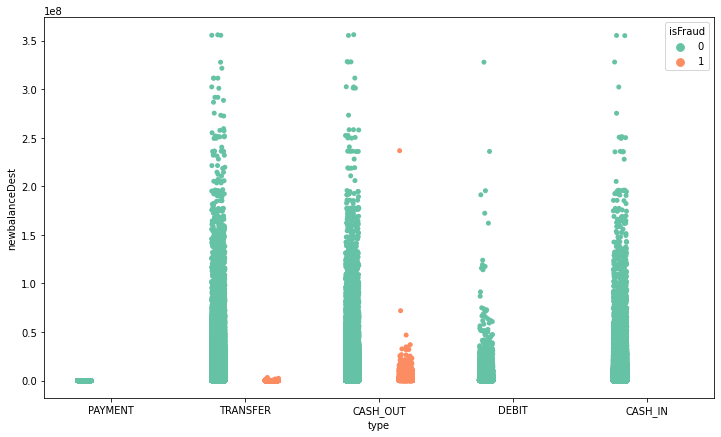

In [ ]:
#set x y axis
x_axis = 'type'
y_axis = 'amount'
#set labeling with
labels = 'isFraud'

plt.figure(figsize=(12,7))
ax = sns.stripplot(x=x_axis, y=y_axis, hue=labels,
                   data=paysimData, palette="Set2", dodge=True)

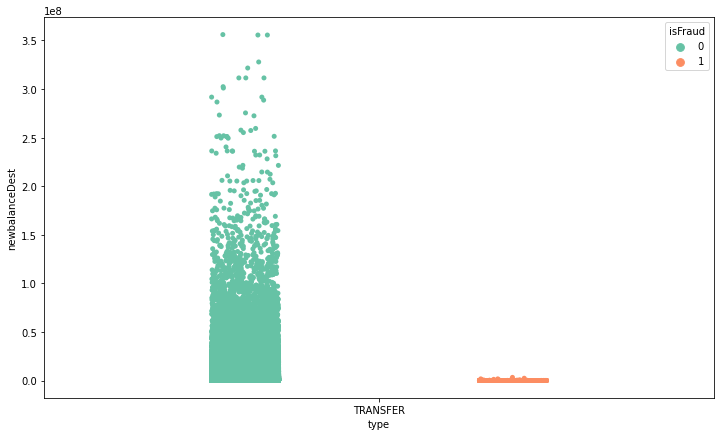

In [ ]:
#set x y axis
x_axis = 'type'
y_axis = 'amount'
#set labeling with
labels = 'isFraud'

plt.figure(figsize=(12,7))
ax = sns.stripplot(x=x_axis, y=y_axis, hue=labels,
                   data=paysimData[paysimData['type'] == 'TRANSFER'], palette="Set2", dodge=True)

## Histogram

&emsp; Histogram คือกราฟแท่งที่แสดงถึงความสัมพัทธ์ระหว่างกลุ่มข้อมูลกับความถี่ของข้อมูล เพื่อดูการกระจายตัวของข้อมูล โดยลักษณะของกลุ่มข้อมูลส่วนมากจะมีลักษณะการเรียงจากน้อยไปหามาก ซึ่งแทนด้วยแกนนอน (แกน x) และแกนตั้ง (แกน y) จะแสดงถึงความถี่ของกลุ่มข้อมูลนั้นๆ

ตัวอย่าง Histogram

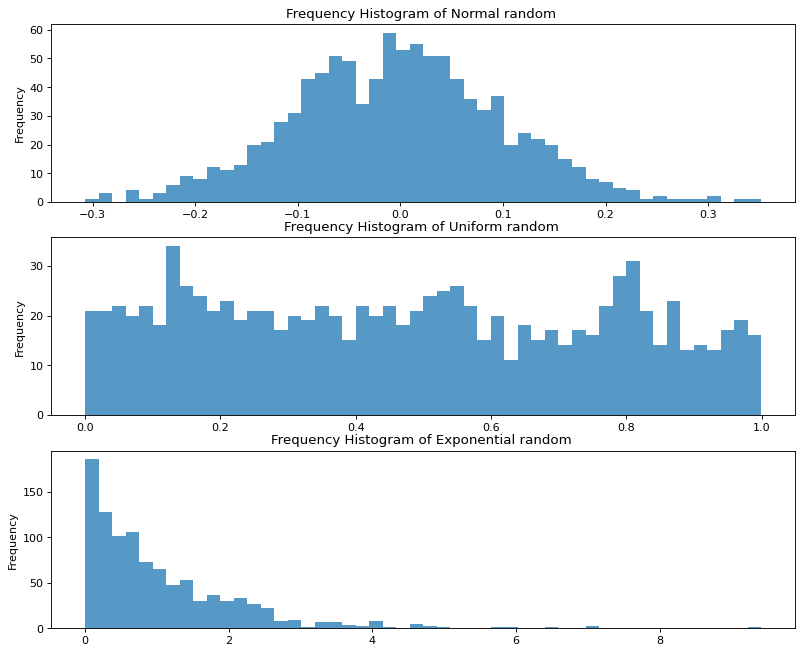

In [41]:
rnormal = np.random.normal(0, 0.1, 1000)
runiform = np.random.uniform(0,1,1000)
rexp = np.random.exponential(1,1000)
randtest = pd.DataFrame({'nomal_random':rnormal,'uniform_random':runiform,'exponential_randon':rexp})
plt.figure(figsize=(12,10), dpi= 80)
kwargs = dict(alpha=0.75, bins=50)
plt.subplot(311).hist(randtest['nomal_random'],**kwargs);
plt.gca().set(title='Frequency Histogram of Normal random ', ylabel='Frequency');
plt.subplot(312).hist(randtest['uniform_random'],**kwargs);
plt.gca().set(title='Frequency Histogram of Uniform random ', ylabel='Frequency');
plt.subplot(313).hist(randtest['exponential_randon'],**kwargs);
plt.gca().set(title='Frequency Histogram of Exponential random ', ylabel='Frequency');

In [ ]:
paysimData.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

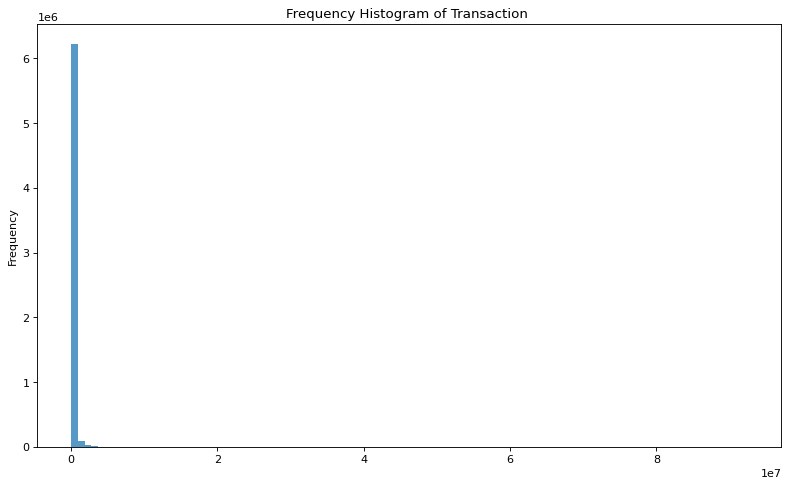

In [ ]:
#Select colunm
colSelect = 'amount'

plt.figure(figsize=(12,7), dpi= 80)
kwargs = dict(alpha=0.75, bins=100)

plt.hist(paysimData[colSelect],**kwargs);
plt.gca().set(title='Frequency Histogram of Transaction ', ylabel='Frequency');

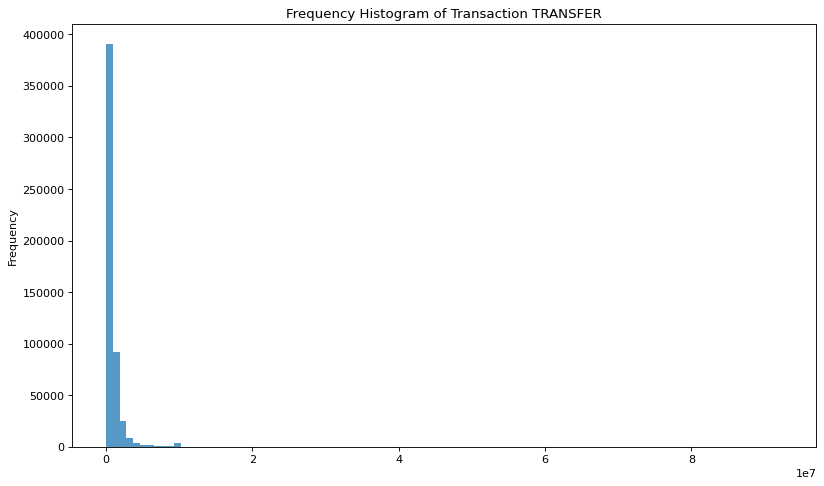

In [ ]:
#Select colunm
colSelect = 'amount'
#Select types of transaction
types = 'TRANSFER'

#plot histogram
plt.figure(figsize=(12,7), dpi= 80)

plt.hist(paysimData[paysimData['type'] == types][colSelect],**kwargs);
plt.gca().set(title='Frequency Histogram of Transaction '+types, ylabel='Frequency');

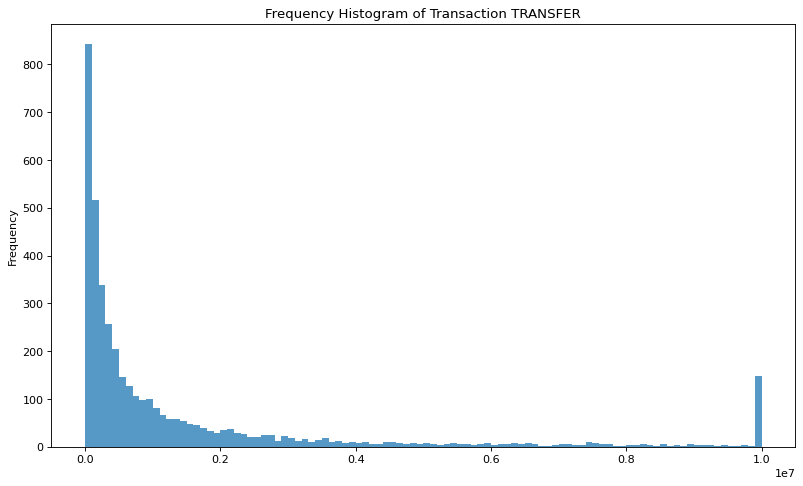

In [ ]:
#Select colunm
colSelect = 'amount'
#Select types of transaction
types = 'TRANSFER'
#Select types of fraud
isFraud = 1

plt.figure(figsize=(12,7), dpi= 80)

plt.hist(paysimData[(paysimData['isFraud'] == isFraud) & (paysimData['type'] == types)][colSelect].reset_index(drop=True),**kwargs);
plt.gca().set(title='Frequency Histogram of Transaction '+types, ylabel='Frequency');

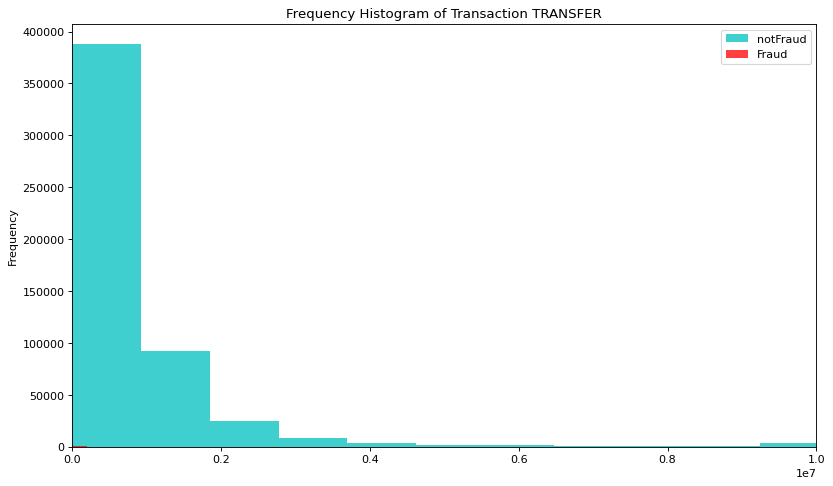

In [ ]:
plt.figure(figsize=(12,7), dpi= 80)

plt.hist(paysimData[(paysimData['isFraud'] == 0) & (paysimData['type'] == types)][colSelect].reset_index(drop=True),**kwargs, color='c', label='notFraud');
plt.hist(paysimData[(paysimData['isFraud'] == 1) & (paysimData['type'] == types)][colSelect].reset_index(drop=True),**kwargs, color='r', label='Fraud');
plt.gca().set(title='Frequency Histogram of Transaction '+types, ylabel='Frequency');
# plt.ylim(0,2500);
plt.xlim(0,10000000);
plt.legend();

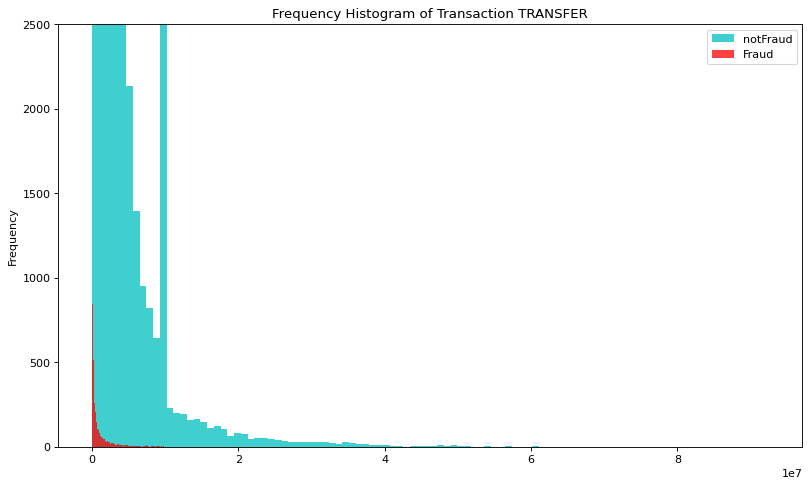

In [ ]:
plt.figure(figsize=(12,7), dpi= 80)

plt.hist(paysimData[(paysimData['isFraud'] == 0) & (paysimData['type'] == types)][colSelect].reset_index(drop=True),**kwargs, color='c', label='notFraud');
plt.hist(paysimData[(paysimData['isFraud'] == 1) & (paysimData['type'] == types)][colSelect].reset_index(drop=True),**kwargs, color='r', label='Fraud');
plt.gca().set(title='Frequency Histogram of Transaction '+types, ylabel='Frequency');
plt.ylim(0,2500);
# plt.xlim(10000000,100000000);
plt.legend();

## Box plot

&emsp; Box plot เป็นกราฟที่อธิบายถึงการกระจายตัวของข้อมูลว่ามีลักษณะการแจงแจงอย่างไร โดยจะแสดงถึงค่า Max, Min, Medien และ Outlier ของข้อมูลชุดนั้น

ภาพด้านล่างจะแสดงค่าต่างๆที่สอดคล้องกับการทำ Box plot

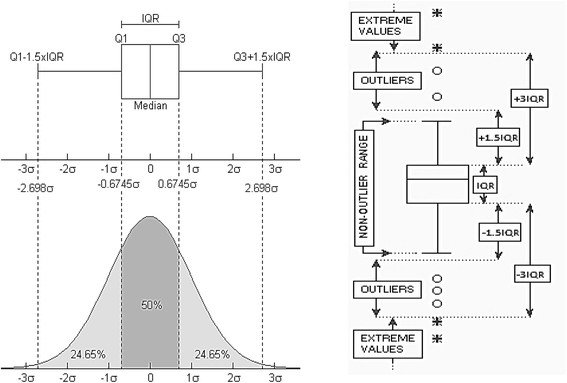

รูปภาพจาก T. Andrysiak, L. Saganowski and W. Mazurczyk (2016). network anomaly detection for railway critical infrastructure based on autoregressive fractional integrated moving average, wireless communications and networking, vol. 245, pp. 1-14

In [ ]:
paysimData.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
#Select column
selectCol = 'amount'

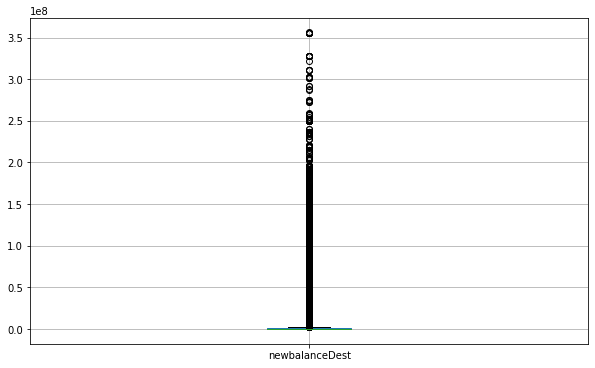

In [ ]:
paysimData.boxplot(column=[selectCol] ,figsize=(10,6));

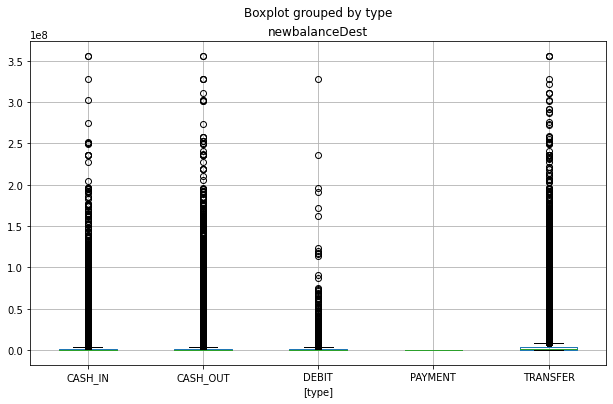

In [ ]:
paysimData.boxplot(column=[selectCol], by=['type'] ,figsize=(10,6));

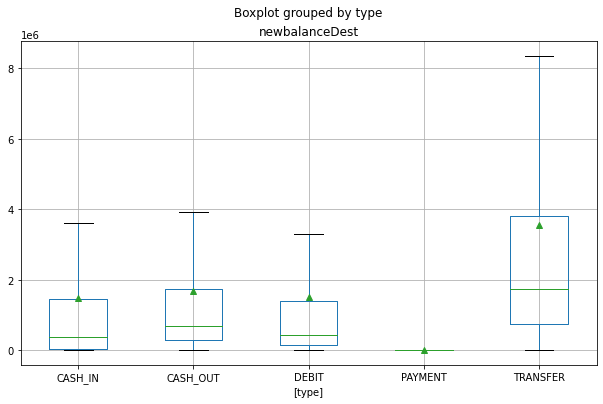

In [ ]:
#Select column
selectCol = 'amount'
paysimData.boxplot(column=[selectCol], by=['type'], figsize=(10,6)
                   , showmeans=True
                   , showfliers=False);

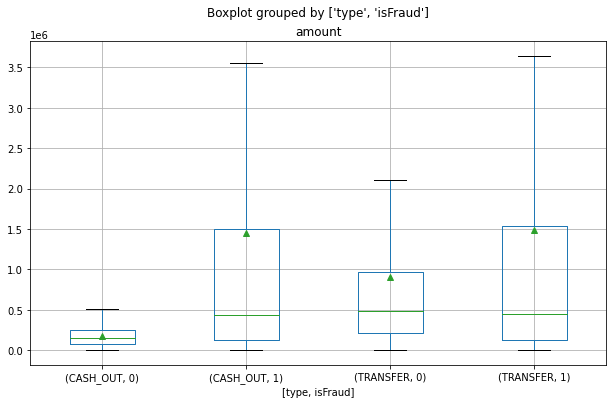

In [ ]:
#Select column
selectCol = 'amount'
paysimData[(paysimData['type'] == 'TRANSFER') | (paysimData['type'] == 'CASH_OUT')].boxplot(column=[selectCol]
                                                                                            , by=['type', 'isFraud']
                                                                                            , showmeans=True
                                                                                            , showfliers=False
                                                                                            , figsize=(10,6));

## Line chart

&emsp; Line chart เป็นกราฟที่แสดงถึงลักษณะแนวโน้มของข้อมูลตามช่วงเวลา โดยแกนนอนจะแสดงถึงช่วงเวลา (Time Series) และแกนตั้งจะแสดงถึงค่าต่างๆที่สนใจ

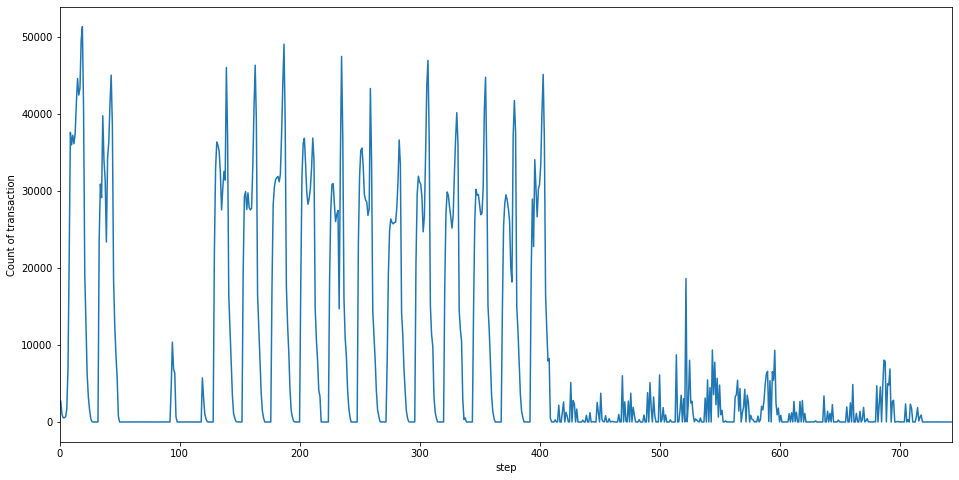

In [ ]:
ax = paysimData.groupby(['step'])['step'].count().plot(figsize=(16,8));
ax.set_xlabel("step");
ax.set_ylabel("Count of transaction");
plt.xlim(0,744);

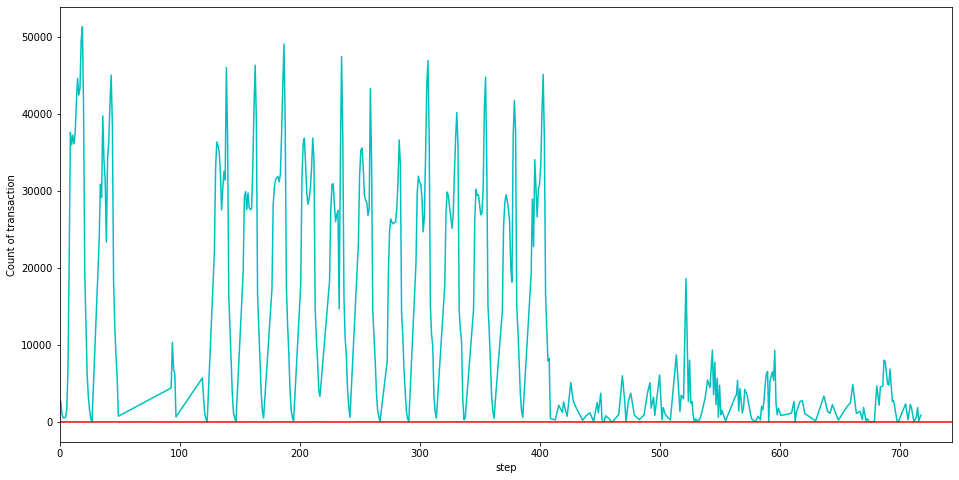

In [ ]:
ax = paysimData[paysimData['isFraud'] == 0].groupby(['step'])['step'].count().plot(figsize=(16,8), color='c', label='0');
ax = paysimData[paysimData['isFraud'] == 1].groupby(['step'])['step'].count().plot(figsize=(16,8), color='r', label='1');
ax.set_xlabel("step");
ax.set_ylabel("Count of transaction");
plt.xlim(0,744);

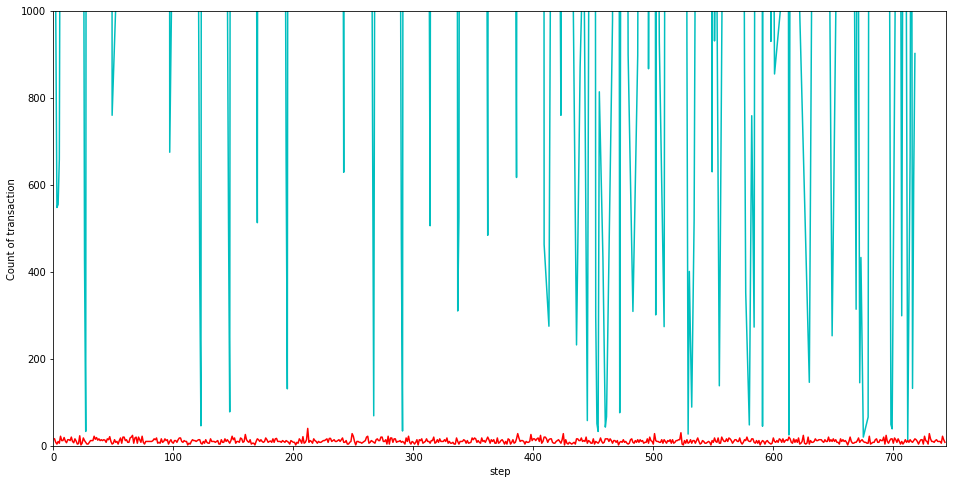

In [ ]:
ax = paysimData[paysimData['isFraud'] == 0].groupby(['step'])['step'].count().plot(figsize=(16,8), color='c', label='0');
ax = paysimData[paysimData['isFraud'] == 1].groupby(['step'])['step'].count().plot(figsize=(16,8), color='r', label='1');
ax.set_xlabel("step");
ax.set_ylabel("Count of transaction");
plt.ylim(0,1000);
plt.xlim(0,744);

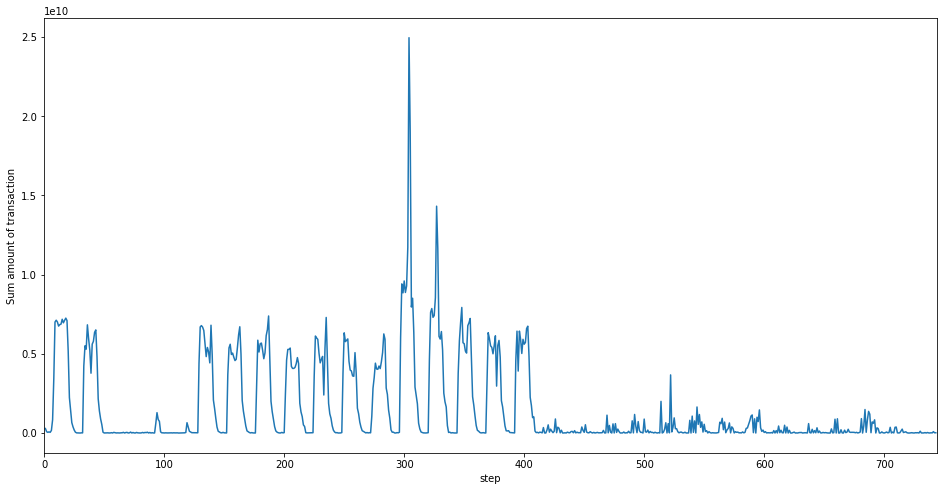

In [ ]:
selectCol = 'amount'
ax = paysimData.groupby(['step'])[selectCol].sum().plot(figsize=(16,8));
ax.set_xlabel("step");
ax.set_ylabel("Sum "+selectCol+" of transaction");
plt.xlim(0,744);

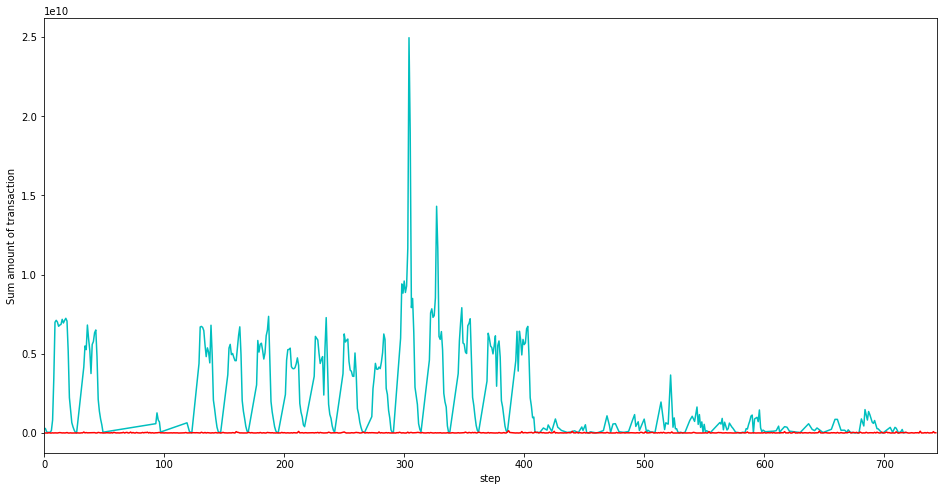

In [ ]:
ax = paysimData[paysimData['isFraud'] == 0].groupby(['step'])[selectCol].sum().plot(figsize=(16,8), color='c', label='0');
ax = paysimData[paysimData['isFraud'] == 1].groupby(['step'])[selectCol].sum().plot(figsize=(16,8), color='r', label='1');
ax.set_xlabel("step");
ax.set_ylabel("Sum "+selectCol+" of transaction");
plt.xlim(0,744);

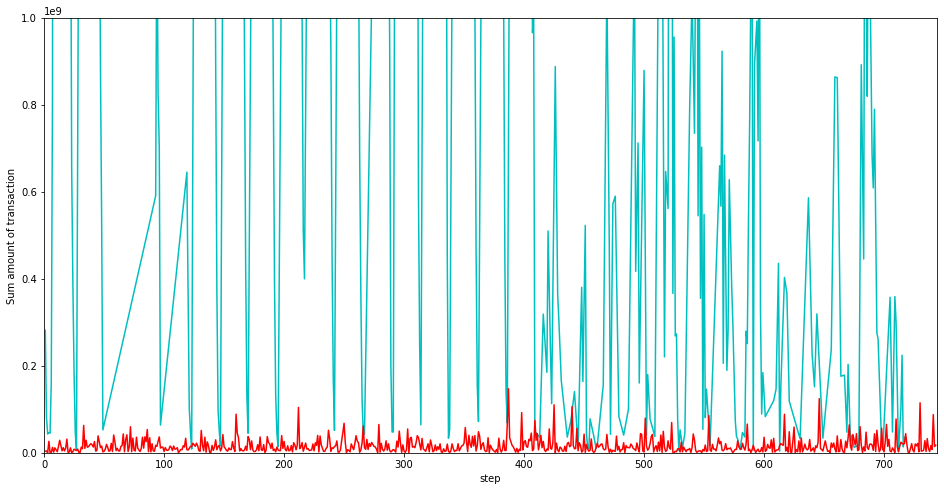

In [ ]:
ax = paysimData[paysimData['isFraud'] == 0].groupby(['step'])[selectCol].sum().plot(figsize=(16,8), color='c', label='0');
ax = paysimData[paysimData['isFraud'] == 1].groupby(['step'])[selectCol].sum().plot(figsize=(16,8), color='r', label='1');
ax.set_xlabel("step");
ax.set_ylabel("Sum "+selectCol+" of transaction");
plt.ylim(0,1000000000);
plt.xlim(0,744);